In [15]:
!pip install openpyxl
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
  Using cached plotly-6.5.2-py3-none-any.whl.metadata (8.5 kB)
Using cached plotly-6.5.2-py3-none-any.whl (9.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.0/444.0 kB 4.0 MB/s eta 0:00:00:00:01

[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [1]:
# ALWAYS RUN THIS FIRST!
import os
import sys
from pathlib import Path

NOTEBOOK_DIR = Path("/rsrch9/home/plm/idso_fa1_pathology/codes/yshokrollahi/vitamin-p-latest")
os.chdir(NOTEBOOK_DIR)
sys.path.insert(0, str(NOTEBOOK_DIR))

print(f"✅ Working directory: {os.getcwd()}")


✅ Working directory: /rsrch9/home/plm/idso_fa1_pathology/codes/yshokrollahi/vitamin-p-latest



SET 1
MOS001S1 has Ovarian clear cell carcinoma 
MOS002S1 has Cholangiocarcinoma
MOS003S1 has Colorectal adenocarcinoma
MOS004S1 has Rectal squamous cell carcinoma
MOS005S1 has Cholangiocarcinoma
MOS006S1 has Cholangiocarcinoma
MOS007S1 has Cholangiocarcinoma
MOS008S1 has Hurthle cell carcinoma
MOS009S1 has Cholangiocarcinoma
MOS010S1 has Lung adenocarcinoma
MOS011S1 has Papillary thyroid carcinoma
MOS012S1 has Colorectal adenocarcinoma
MOS014S1 has Ovarian serous carcinoma
TO20S1 has Control tonsil

SET 2
MOS015S1 has Papillary urothelial carcinoma
MOS016S1 has Papillary urothelial carcinoma
MOS017S1 has Papillary urothelial carcinoma
MOS018S1 has Papillary urothelial carcinoma
MOS019S1 has Papillary urothelial carcinoma
MOS020S1 has Papillary urothelial carcinoma
MOS021S1 has Papillary urothelial carcinoma
MOS022S1 has Papillary urothelial carcinoma
MOS023S1 has Papillary urothelial carcinoma
MOS024S1 has Papillary urothelial carcinoma
MOS025S1 has Papillary urothelial carcinoma
MOS

/home/yshokrollahi/.local/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/yshokrollahi/.local/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/yshokrollahi/.local/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/yshokrollahi/.local/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/yshokrollahi/.local/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


MOS045S1 has Medullary thyroid carcinoma
MOS046S1 has Pancreatic neuroendocrine tumor
MOS047S1 has Lung neuroendocrine carcinoma
MOS048T2S1 has Cervical neuroendocrine carcinoma
MOS049T2S1 has Neuroendocrine carcinoma
MOS050T2S1 has Pancreatic neuroendocrine tumor
MOS051T2S1 has Pancreatic neuroendocrine tumor
MOS052T2S1 has Merkel cell carcinoma
MOS053T2S1 has Neuroendocrine tumor
MOS054T2S1 has Neuroendocrine tumor
TO20S1 has Control tonsil

SET 5
MOS055S1 has Mesothelioma
MOS056S1 has Mesothelioma
MOS057S1 has Mesothelioma
MOS058S1 has Hepatocellular carcinoma
MOS059S1 has Ovarian clear cell carcinoma
MOS060S1 has Well-differentiated papillary mesothelial tumor
MOS061S1 has  Pancreas solid pseudopapillary neoplasm
MOS062S1 has Colorectal adenocarcinoma
MOS063S1 has Mucoepidermoid carcinoma
MOS064S1 has Esophageal adenocarcinoma
MOS065S1 has Esophageal adenocarcinoma
MOS066S1 has Papillary urothelial carcinoma
MOS067S1 has Undifferentiated thyroid carcinoma
MOS068S1 has Papillary uro

/home/yshokrollahi/.local/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/yshokrollahi/.local/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/yshokrollahi/.local/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/yshokrollahi/.local/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


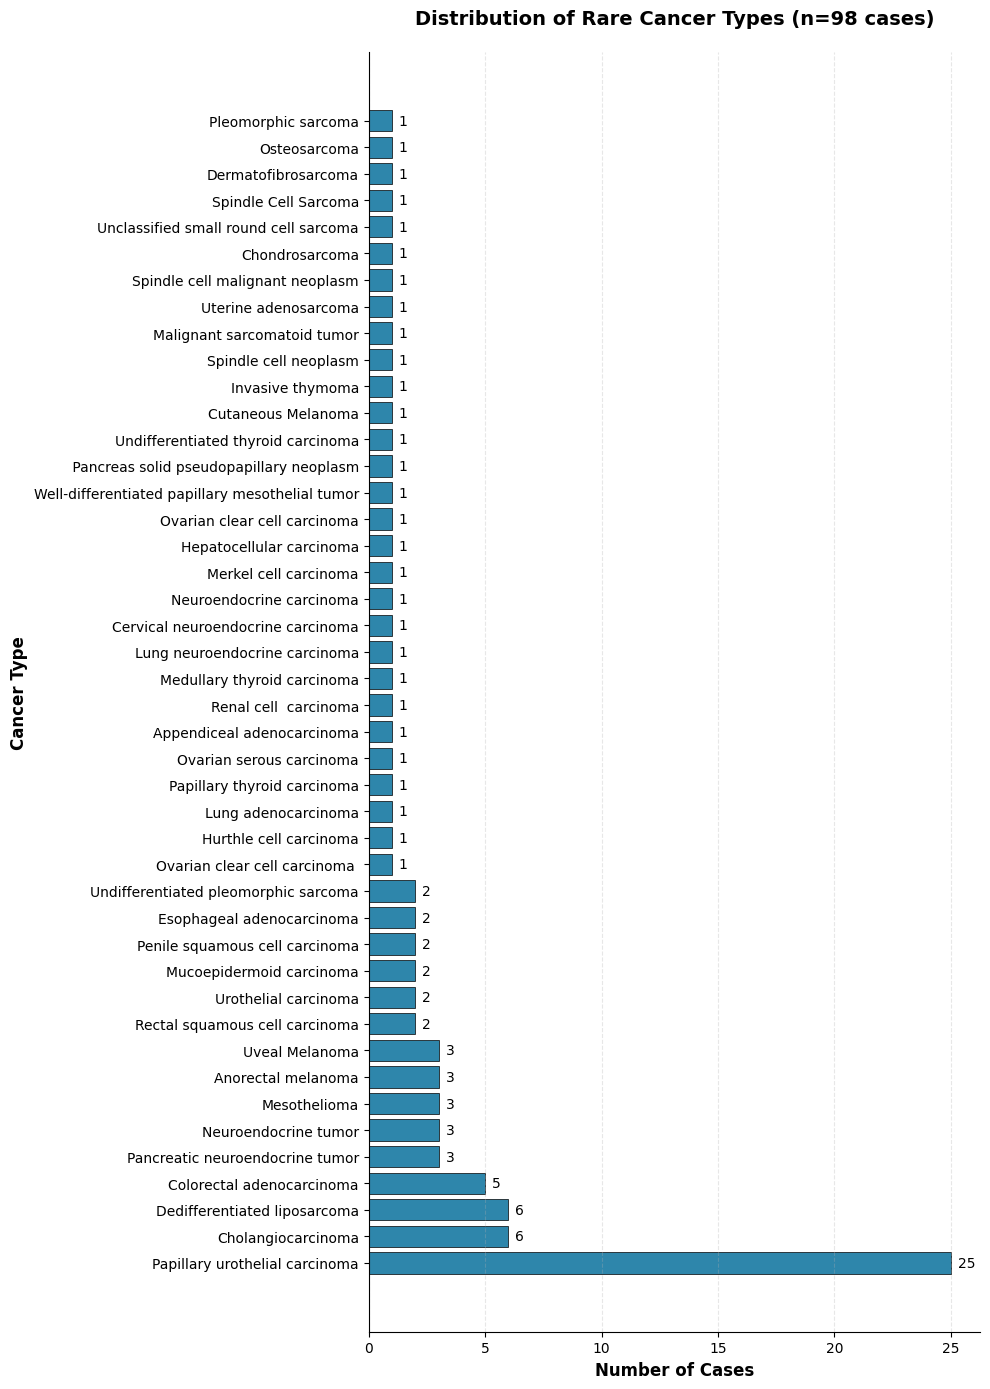


Total cases: 98
Distinct cancer types: 44

Cancer type frequencies:
Papillary urothelial carcinoma: 25
Cholangiocarcinoma: 6
Dedifferentiated liposarcoma: 6
Colorectal adenocarcinoma: 5
Pancreatic neuroendocrine tumor: 3
Neuroendocrine tumor: 3
Mesothelioma: 3
Anorectal melanoma: 3
Uveal Melanoma: 3
Rectal squamous cell carcinoma: 2
Urothelial carcinoma: 2
Mucoepidermoid carcinoma: 2
Penile squamous cell carcinoma: 2
Esophageal adenocarcinoma: 2
Undifferentiated pleomorphic sarcoma: 2
Ovarian clear cell carcinoma : 1
Hurthle cell carcinoma: 1
Lung adenocarcinoma: 1
Papillary thyroid carcinoma: 1
Ovarian serous carcinoma: 1
Appendiceal adenocarcinoma: 1
Renal cell  carcinoma: 1
Medullary thyroid carcinoma: 1
Lung neuroendocrine carcinoma: 1
Cervical neuroendocrine carcinoma: 1
Neuroendocrine carcinoma: 1
Merkel cell carcinoma: 1
Hepatocellular carcinoma: 1
Ovarian clear cell carcinoma: 1
Well-differentiated papillary mesothelial tumor: 1
 Pancreas solid pseudopapillary neoplasm: 1
Undi

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter

# Base path
base_path = '/rsrch9/home/plm/idso_fa1_pathology/TIER1/patient-mosaic/2014-0938/MOSAIC/DSP'

# Dictionary to store all data
all_data = {}

# Iterate through Set 1 to Set 16
for i in range(1, 10):
    # Try both naming conventions
    folder_names = [f'MOSAIC DSP Set {i}', f'MOSAIC Set {i}']
    file_names = [f'MOSAIC DSP Set {i} Annotations AS.xlsx', f'MOSAIC Set {i} Annotations AS.xlsx']
    
    found = False
    for folder_name in folder_names:
        for file_name in file_names:
            file_path = os.path.join(base_path, folder_name, 'Data', file_name)
            
            # Check if file exists
            if os.path.exists(file_path):
                found = True
                print(f"\n{'='*60}")
                print(f"SET {i}")
                print(f"{'='*60}")
                
                try:
                    # Read the Excel file to check column names
                    df = pd.read_excel(file_path)
                    
                    # Determine which column name is present
                    if 'Primary_Dx' in df.columns:
                        dx_column = 'Primary_Dx'
                    elif 'Primary Dx' in df.columns:
                        dx_column = 'Primary Dx'
                    else:
                        print(f"Neither 'Primary_Dx' nor 'Primary Dx' found in columns")
                        print(f"Available columns: {list(df.columns)}")
                        break
                    
                    # Keep only the columns we need
                    df = df[['Slide_ID_DSP', dx_column]]
                    
                    # Remove duplicate slide IDs
                    df_unique = df.drop_duplicates(subset='Slide_ID_DSP')
                    
                    # Print and store the results
                    for _, row in df_unique.iterrows():
                        slide_id = row['Slide_ID_DSP']
                        cancer_type = row[dx_column]
                        print(f"{slide_id} has {cancer_type}")
                        
                        # Store in dictionary (skip control samples)
                        if 'control' not in cancer_type.lower() and 'tonsil' not in cancer_type.lower():
                            all_data[slide_id] = cancer_type
                            
                except Exception as e:
                    print(f"Error reading file: {e}")
                
                break
        if found:
            break
    
    if not found:
        print(f"\n{'='*60}")
        print(f"SET {i}")
        print(f"{'='*60}")
        print(f"File not found for Set {i}")

print(f"\n{'='*60}")
print("VISUALIZATION")
print(f"{'='*60}")

# Count cancer types
cancer_counts = Counter(all_data.values())

# Sort by frequency
sorted_cancers = sorted(cancer_counts.items(), key=lambda x: x[1], reverse=True)
cancer_types = [x[0] for x in sorted_cancers]
counts = [x[1] for x in sorted_cancers]

# Create figure
fig, ax = plt.subplots(figsize=(10, 14))

# Create horizontal bar chart
bars = ax.barh(cancer_types, counts, color='#2E86AB', edgecolor='black', linewidth=0.5)

# Styling for Nature-style
ax.set_xlabel('Number of Cases', fontsize=12, fontweight='bold')
ax.set_ylabel('Cancer Type', fontsize=12, fontweight='bold')
ax.set_title(f'Distribution of Rare Cancer Types (n={len(all_data)} cases)', fontsize=14, fontweight='bold', pad=20)

# Add count labels on bars
for i, (bar, count) in enumerate(zip(bars, counts)):
    ax.text(count + 0.3, i, str(count), va='center', fontsize=10)

# Clean up
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nTotal cases: {len(all_data)}")
print(f"Distinct cancer types: {len(cancer_counts)}")
print(f"\nCancer type frequencies:")
for cancer, count in sorted_cancers:
    print(f"{cancer}: {count}")

In [3]:
import pandas as pd
from collections import Counter, defaultdict

# Your data (extracted from the output)
all_data = {
    'MOS001S1': 'Ovarian clear cell carcinoma ',
    'MOS002S1': 'Cholangiocarcinoma',
    'MOS003S1': 'Colorectal adenocarcinoma',
    'MOS004S1': 'Rectal squamous cell carcinoma',
    'MOS008S1': 'Hurthle cell carcinoma',
    'MOS010S1': 'Lung adenocarcinoma',
    'MOS011S1': 'Papillary thyroid carcinoma',
    'MOS014S1': 'Ovarian serous carcinoma',
    'MOS015S1': 'Papillary urothelial carcinoma',
    'MOS027S1': 'Urothelial carcinoma',
    'MOS030S1': 'Appendiceal adenocarcinoma',
    'MOS033S1': 'Mucoepidermoid carcinoma',
    'MOS034S1': 'Penile squamous cell carcinoma',
    'MOS042S1': 'Renal cell  carcinoma',
    'MOS045S1': 'Medullary thyroid carcinoma',
    'MOS046S1': 'Pancreatic neuroendocrine tumor',
    'MOS047S1': 'Lung neuroendocrine carcinoma',
    'MOS048T2S1': 'Cervical neuroendocrine carcinoma',
    'MOS049T2S1': 'Neuroendocrine carcinoma',
    'MOS052T2S1': 'Merkel cell carcinoma',
    'MOS053T2S1': 'Neuroendocrine tumor',
    'MOS055S1': 'Mesothelioma',
    'MOS058S1': 'Hepatocellular carcinoma',
    'MOS059S1': 'Ovarian clear cell carcinoma',
    'MOS060S1': 'Well-differentiated papillary mesothelial tumor',
    'MOS061S1': ' Pancreas solid pseudopapillary neoplasm',
    'MOS064S1': 'Esophageal adenocarcinoma',
    'MOS067S1': 'Undifferentiated thyroid carcinoma',
    'MOS070S1': 'Anorectal melanoma',
    'MOS073S1': 'Uveal Melanoma',
    'MOS076S1': 'Cutaneous Melanoma',
    'MOS078S1': 'Invasive thymoma',
    'MOS082S1': 'Spindle cell neoplasm',
    'MOS083S1': 'Malignant sarcomatoid tumor',
    'MOS084S1': 'Uterine adenosarcoma',
    'MOS085S1': 'Spindle cell malignant neoplasm',
    'MOS086S1': 'Chondrosarcoma',
    'MOS087S1': 'Dedifferentiated liposarcoma',
    'MOS088S1': 'Unclassified small round cell sarcoma',
    'MOS090S1': 'Spindle Cell Sarcoma',
    'MOS092S4': 'Dermatofibrosarcoma',
    'MOS093S4': 'Osteosarcoma',
    'MOS094T2S1': 'Pleomorphic sarcoma',
    'MOS096S3': 'Undifferentiated pleomorphic sarcoma',
    'MOS097S1': 'Synovial Sarcoma',
    'MOS098S1': 'Leiomyosarcoma',
    'MOS099S1': 'Ossifying fibromyxoid tumor',
    'MOS100S1': 'Desmoplastic small round cell tumor',
    'MOS103S1': 'Liposarcoma',
    'MOS104S1': 'Hyalinizing spindle cell sarcoma',
    'MOS109S1': 'Well-differentiated liposarcoma',
    'MOS114S1': 'Rhabdomyosarcoma',
    'MOS118S1': 'Alveolar soft part sarcoma',
    'MOS132S1': 'Spindle cell sarcoma',
    'MOS138T2S1': 'Low grade sarcomatoid process',
    'MOS143S1': 'Synovial sarcoma',
    'MOS150S1': 'Extraskeletal Chondrosarcoma',
    'MOS153S1': 'Uterine carcinosarcoma',
    'MOS158S1': 'Chordoma',
    'MOS160S1': 'Vulvovaginal melanoma',
    'MOS163S1': 'Sinonasal melanoma',
    'MOS171S1': 'Conjunctival melanoma',
    'MOS184S1': 'Nasolacrimal melanoma',
}

# Group by cancer type
cancer_to_slides = defaultdict(list)
for slide, cancer in all_data.items():
    cancer_to_slides[cancer].append(slide)

# Print selected samples
print("SELECTED SAMPLES TO REPRESENT ALL 63 DISTINCT CANCER TYPES")
print("="*70)
print(f"\nTotal samples needed: {len(cancer_to_slides)}")
print(f"\nSlide ID -> Cancer Type")
print("-"*70)

selected_samples = []
for cancer_type in sorted(cancer_to_slides.keys()):
    # Select the first slide for each cancer type
    slide_id = cancer_to_slides[cancer_type][0]
    selected_samples.append((slide_id, cancer_type))
    print(f"{slide_id:15s} -> {cancer_type}")

print("\n" + "="*70)
print(f"TOTAL SELECTED: {len(selected_samples)} samples")
print("="*70)

# Print by cancer category for better organization
print("\n\nORGANIZED BY CATEGORY:")
print("="*70)

categories = {
    'Carcinomas - GI': ['Cholangiocarcinoma', 'Colorectal adenocarcinoma', 'Rectal squamous cell carcinoma', 
                        'Appendiceal adenocarcinoma', 'Esophageal adenocarcinoma', 'Hepatocellular carcinoma',
                        ' Pancreas solid pseudopapillary neoplasm'],
    'Carcinomas - Gynecologic': ['Ovarian clear cell carcinoma ', 'Ovarian clear cell carcinoma', 'Ovarian serous carcinoma',
                                  'Cervical neuroendocrine carcinoma', 'Uterine adenosarcoma', 'Uterine carcinosarcoma'],
    'Carcinomas - Urologic': ['Papillary urothelial carcinoma', 'Urothelial carcinoma', 'Renal cell  carcinoma',
                              'Penile squamous cell carcinoma'],
    'Carcinomas - Thyroid': ['Papillary thyroid carcinoma', 'Medullary thyroid carcinoma', 'Undifferentiated thyroid carcinoma',
                            'Hurthle cell carcinoma'],
    'Neuroendocrine Tumors': ['Pancreatic neuroendocrine tumor', 'Lung neuroendocrine carcinoma', 'Neuroendocrine carcinoma',
                              'Neuroendocrine tumor', 'Merkel cell carcinoma'],
    'Lung': ['Lung adenocarcinoma'],
    'Mesothelioma': ['Mesothelioma', 'Well-differentiated papillary mesothelial tumor'],
    'Other Carcinomas': ['Mucoepidermoid carcinoma', 'Invasive thymoma'],
    'Melanomas': ['Anorectal melanoma', 'Vulvovaginal melanoma', 'Sinonasal melanoma', 'Uveal Melanoma',
                  'Cutaneous Melanoma', 'Conjunctival melanoma', 'Nasolacrimal melanoma'],
    'Sarcomas - Liposarcoma': ['Dedifferentiated liposarcoma', 'Well-differentiated liposarcoma', 'Liposarcoma'],
    'Sarcomas - Leiomyosarcoma': ['Leiomyosarcoma'],
    'Sarcomas - Bone/Cartilage': ['Chondrosarcoma', 'Osteosarcoma', 'Extraskeletal Chondrosarcoma', 'Chordoma'],
    'Sarcomas - Synovial': ['Synovial Sarcoma', 'Synovial sarcoma'],
    'Sarcomas - Pleomorphic/Spindle': ['Undifferentiated pleomorphic sarcoma', 'Pleomorphic sarcoma', 'Spindle cell neoplasm',
                                        'Spindle cell malignant neoplasm', 'Spindle Cell Sarcoma', 'Spindle cell sarcoma'],
    'Sarcomas - Other': ['Malignant sarcomatoid tumor', 'Unclassified small round cell sarcoma', 'Dermatofibrosarcoma',
                         'Desmoplastic small round cell tumor', 'Ossifying fibromyxoid tumor', 'Hyalinizing spindle cell sarcoma',
                         'Rhabdomyosarcoma', 'Alveolar soft part sarcoma', 'Low grade sarcomatoid process']
}

for category, cancer_types in categories.items():
    print(f"\n{category}:")
    for cancer_type in cancer_types:
        if cancer_type in cancer_to_slides:
            slide_id = cancer_to_slides[cancer_type][0]
            print(f"  {slide_id:15s} -> {cancer_type}")

SELECTED SAMPLES TO REPRESENT ALL 63 DISTINCT CANCER TYPES

Total samples needed: 63

Slide ID -> Cancer Type
----------------------------------------------------------------------
MOS061S1        ->  Pancreas solid pseudopapillary neoplasm
MOS118S1        -> Alveolar soft part sarcoma
MOS070S1        -> Anorectal melanoma
MOS030S1        -> Appendiceal adenocarcinoma
MOS048T2S1      -> Cervical neuroendocrine carcinoma
MOS002S1        -> Cholangiocarcinoma
MOS086S1        -> Chondrosarcoma
MOS158S1        -> Chordoma
MOS003S1        -> Colorectal adenocarcinoma
MOS171S1        -> Conjunctival melanoma
MOS076S1        -> Cutaneous Melanoma
MOS087S1        -> Dedifferentiated liposarcoma
MOS092S4        -> Dermatofibrosarcoma
MOS100S1        -> Desmoplastic small round cell tumor
MOS064S1        -> Esophageal adenocarcinoma
MOS150S1        -> Extraskeletal Chondrosarcoma
MOS058S1        -> Hepatocellular carcinoma
MOS008S1        -> Hurthle cell carcinoma
MOS104S1        -> Hyalinizing 

Saved: cancer_type_hierarchy.pdf


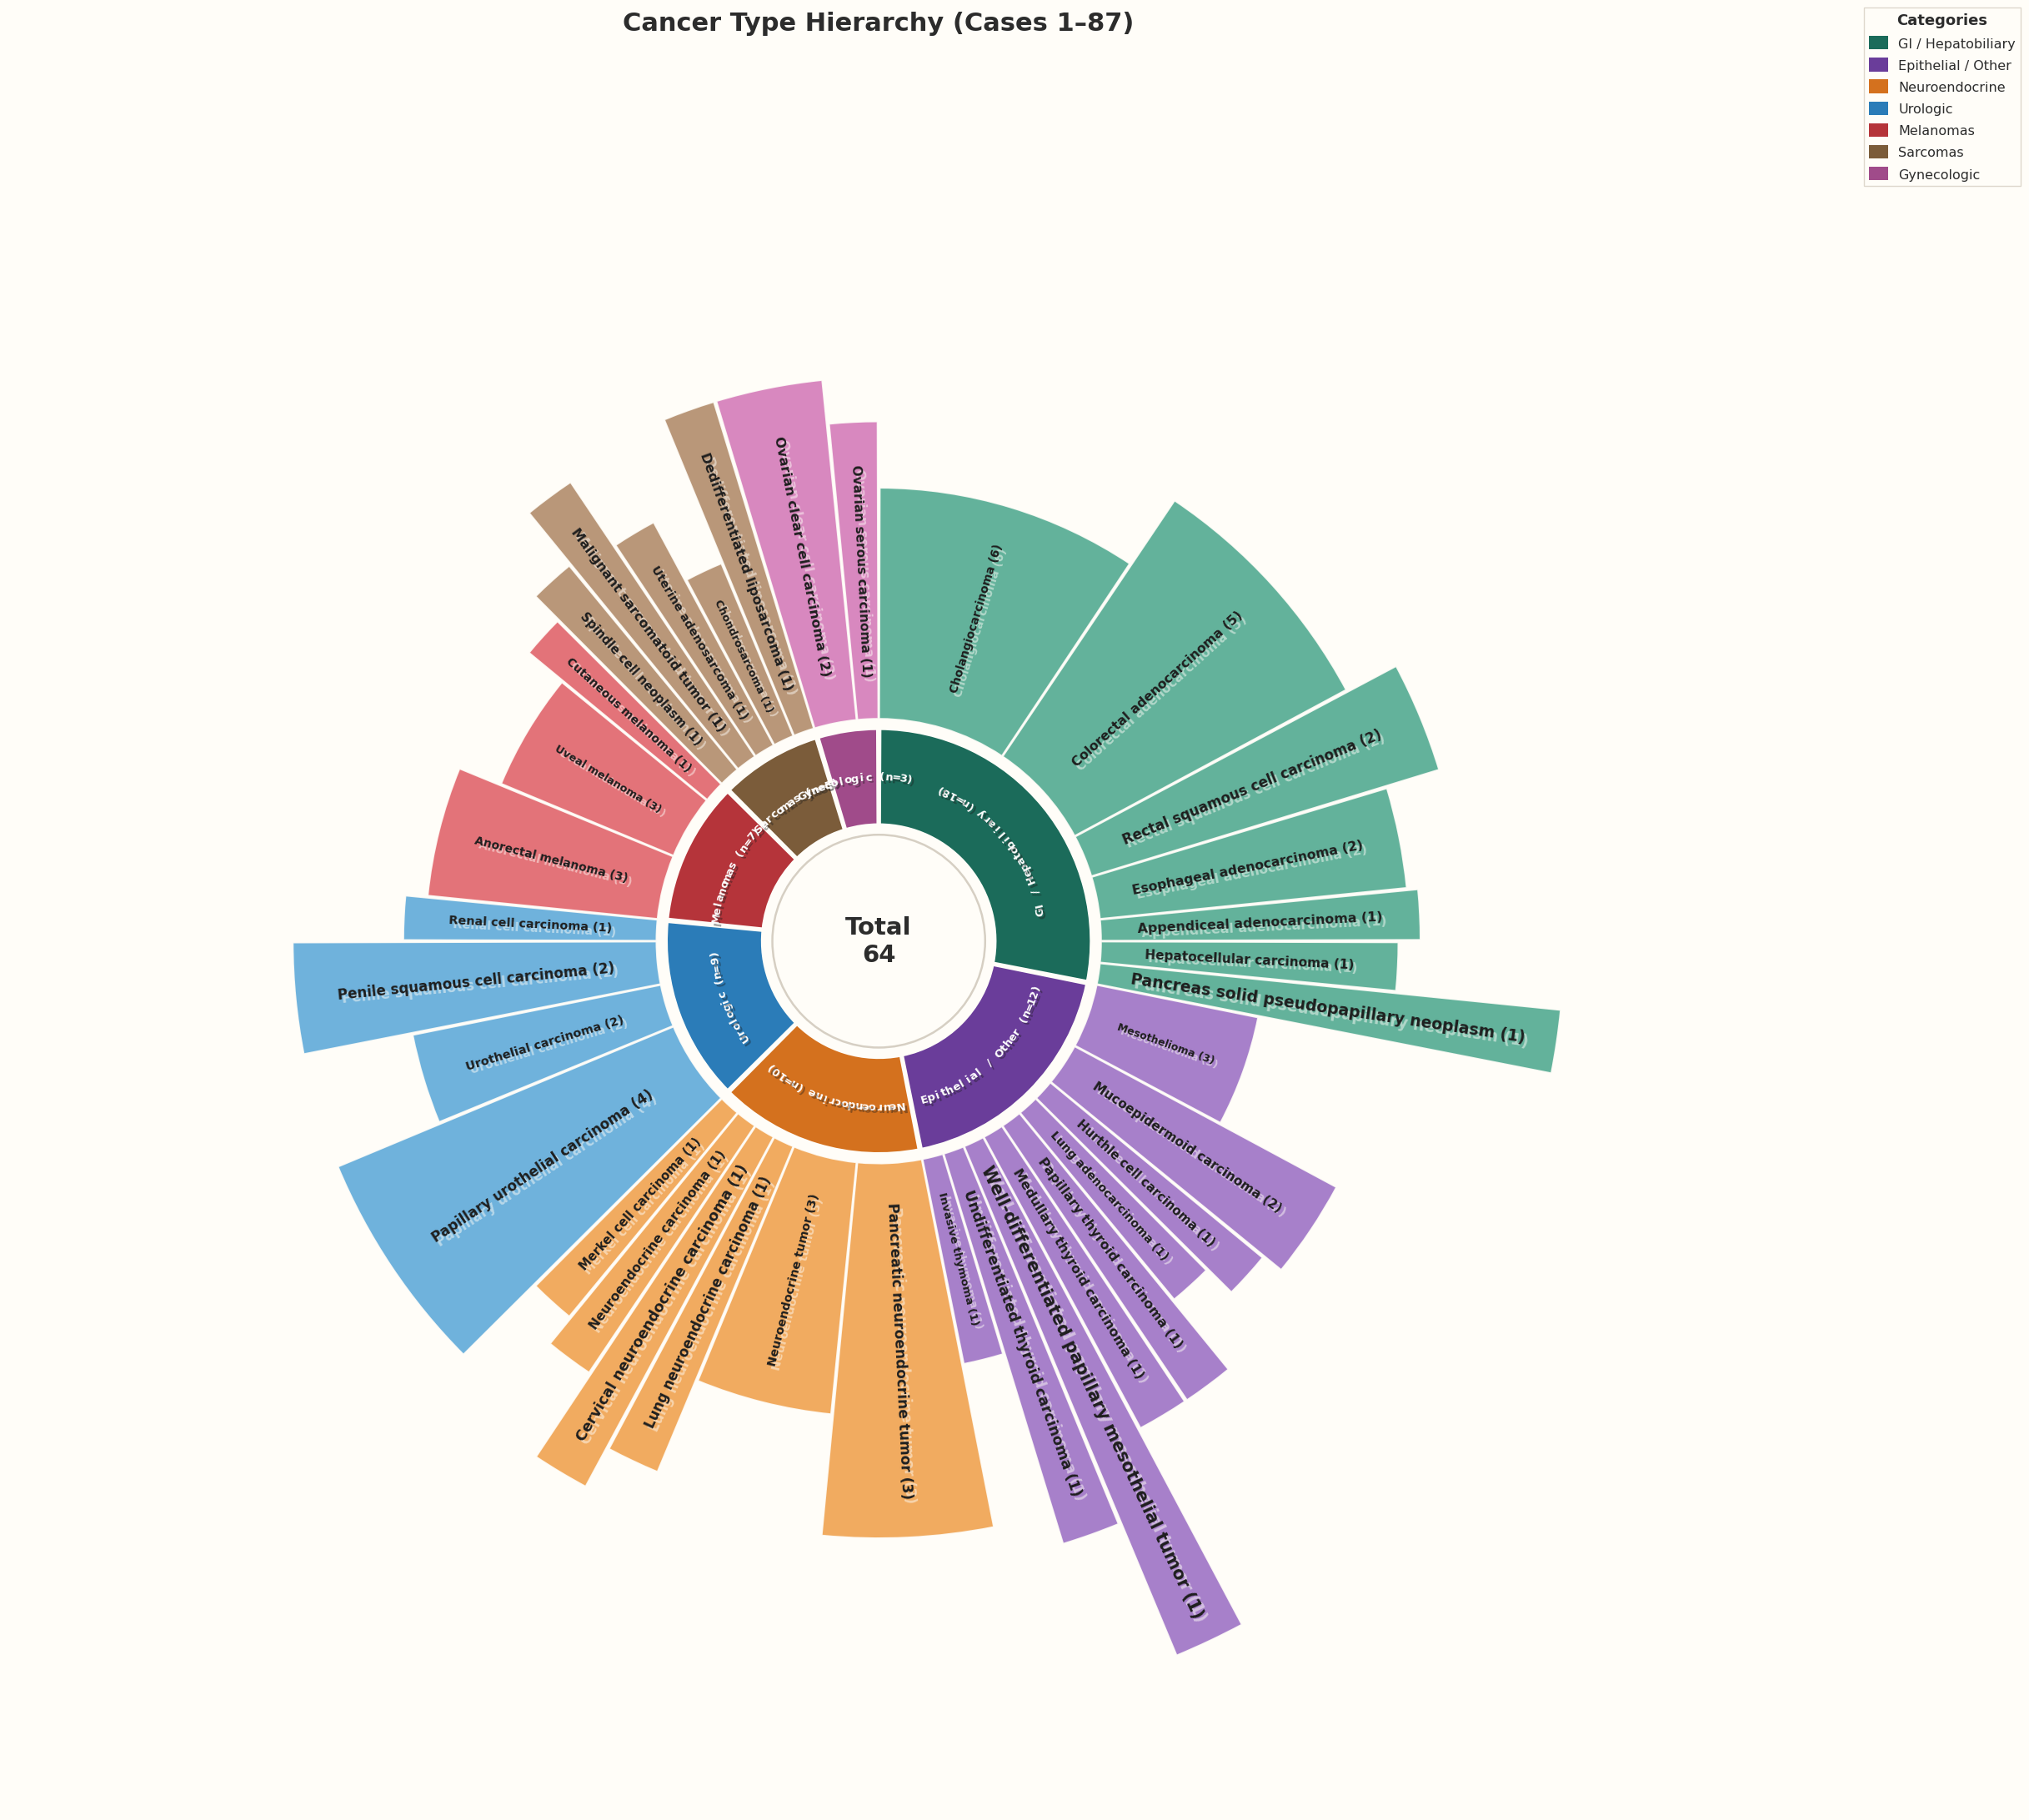

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.patches import Wedge, Patch
from collections import defaultdict, Counter

# ==========================================
# DATA  (cases 1–87)
# ==========================================
all_data = {
    'MOS001S1':   'Ovarian clear cell carcinoma',
    'MOS002S1':   'Cholangiocarcinoma',
    'MOS003S1':   'Colorectal adenocarcinoma',
    'MOS004S1':   'Rectal squamous cell carcinoma',
    'MOS005S1':   'Cholangiocarcinoma',
    'MOS006S1':   'Cholangiocarcinoma',
    'MOS007S1':   'Cholangiocarcinoma',
    'MOS008S1':   'Hurthle cell carcinoma',
    'MOS009S1':   'Cholangiocarcinoma',
    'MOS010S1':   'Lung adenocarcinoma',
    'MOS011S1':   'Papillary thyroid carcinoma',
    'MOS012S1':   'Colorectal adenocarcinoma',
    'MOS014S1':   'Ovarian serous carcinoma',
    'MOS015S1':   'Papillary urothelial carcinoma',
    'MOS016S1':   'Papillary urothelial carcinoma',
    'MOS017S1':   'Papillary urothelial carcinoma',
    'MOS018S1':   'Papillary urothelial carcinoma',
    'MOS027S1':   'Urothelial carcinoma',

    'MOS030S1':   'Appendiceal adenocarcinoma',
    'MOS031S1':   'Rectal squamous cell carcinoma',
    'MOS032S1':   'Cholangiocarcinoma',
    'MOS033S1':   'Mucoepidermoid carcinoma',
    'MOS034S1':   'Penile squamous cell carcinoma',
    'MOS036S1':   'Penile squamous cell carcinoma',

    'MOS041S1':   'Urothelial carcinoma',
    'MOS042S1':   'Renal cell carcinoma',

    'MOS045S1':   'Medullary thyroid carcinoma',
    'MOS046S1':   'Pancreatic neuroendocrine tumor',
    'MOS047S1':   'Lung neuroendocrine carcinoma',
    'MOS048T2S1': 'Cervical neuroendocrine carcinoma',
    'MOS049T2S1': 'Neuroendocrine carcinoma',
    'MOS050T2S1': 'Pancreatic neuroendocrine tumor',
    'MOS051T2S1': 'Pancreatic neuroendocrine tumor',
    'MOS052T2S1': 'Merkel cell carcinoma',
    'MOS053T2S1': 'Neuroendocrine tumor',
    'MOS054T2S1': 'Neuroendocrine tumor',
    'MOS055S1':   'Mesothelioma',
    'MOS056S1':   'Mesothelioma',
    'MOS057S1':   'Mesothelioma',
    'MOS058S1':   'Hepatocellular carcinoma',
    'MOS059S1':   'Ovarian clear cell carcinoma',
    'MOS060S1':   'Well-differentiated papillary mesothelial tumor',
    'MOS061S1':   'Pancreas solid pseudopapillary neoplasm',
    'MOS062S1':   'Colorectal adenocarcinoma',
    'MOS063S1':   'Mucoepidermoid carcinoma',
    'MOS064S1':   'Esophageal adenocarcinoma',
    'MOS065S1':   'Esophageal adenocarcinoma',
    'MOS067S1':   'Undifferentiated thyroid carcinoma',

    'MOS070S1':   'Anorectal melanoma',
    'MOS071S1':   'Anorectal melanoma',
    'MOS072S1':   'Anorectal melanoma',
    'MOS073S1':   'Uveal melanoma',
    'MOS074S1':   'Uveal melanoma',
    'MOS075S1':   'Uveal melanoma',
    'MOS076S1':   'Cutaneous melanoma',
    'MOS077S1':   'Colorectal adenocarcinoma',
    'MOS078S1':   'Invasive thymoma',
    'MOS080S1':   'Colorectal adenocarcinoma',
    'MOS081S1':   'Neuroendocrine tumor',
    'MOS082S1':   'Spindle cell neoplasm',
    'MOS083S1':   'Malignant sarcomatoid tumor',
    'MOS084S1':   'Uterine adenosarcoma',
    'MOS086S1':   'Chondrosarcoma',
    'MOS087S1':   'Dedifferentiated liposarcoma',
}

# ==========================================
# HELPERS
# ==========================================
def categorize(cancer):
    c = cancer.lower().strip()
    if 'melanoma' in c:
        return 'Melanomas'
    elif 'neuroendocrine' in c or 'merkel' in c:
        return 'Neuroendocrine'
    elif any(x in c for x in ['urothelial', 'renal', 'penile']):
        return 'Urologic'
    elif any(x in c for x in ['colorectal', 'rectal', 'cholangiocarcinoma',
                               'appendiceal', 'esophageal', 'hepatocellular', 'pancreas']):
        return 'GI / Hepatobiliary'
    elif any(x in c for x in ['sarcoma', 'spindle cell', 'sarcomatoid', 'chondrosarcoma', 'liposarcoma']):
        return 'Sarcomas'
    elif any(x in c for x in ['ovarian', 'uterine', 'cervical']):
        return 'Gynecologic'
    else:
        return 'Epithelial / Other'

# ==========================================
# GROUP: category -> Counter of cancer_name -> count
# ==========================================
cat_types = defaultdict(Counter)
for cancer in all_data.values():
    cat_types[categorize(cancer)][cancer.strip()] += 1

# Sort categories by total count descending
sorted_cats = sorted(cat_types.items(), key=lambda x: -sum(x[1].values()))

total_cases = sum(sum(v.values()) for v in cat_types.values())

# ==========================================
# STYLE
# ==========================================
# Inner ring: deep saturated base colors
colors_inner = {
    'GI / Hepatobiliary': '#1B6B5A',   # deep teal
    'Epithelial / Other': '#6A3D9A',   # rich violet
    'Neuroendocrine':     '#D4711E',   # warm amber
    'Urologic':           '#2B7CB8',   # ocean blue
    'Melanomas':          '#B5343A',   # deep crimson
    'Sarcomas':           '#7B5C3A',   # warm brown
    'Gynecologic':        '#A04B8A',   # deep magenta
}

# Outer ring: lighter, luminous tints of the same hues
colors_outer = {
    'GI / Hepatobiliary': '#4DA88E',   # fresh seafoam
    'Epithelial / Other': '#9B6FC4',   # soft lavender
    'Neuroendocrine':     '#F0A04B',   # golden peach
    'Urologic':           '#5BA8D9',   # sky blue
    'Melanomas':          '#E06068',   # coral rose
    'Sarcomas':           '#B08968',   # sandy beige
    'Gynecologic':        '#D378B8',   # soft pink
}

colors_map = colors_inner   # legacy alias for legend

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']

fig, ax = plt.subplots(figsize=(24, 24))
fig.patch.set_facecolor('#FFFDF8')
ax.set_facecolor('#FFFDF8')
ax.set_xlim(-4.5, 4.5)
ax.set_ylim(-4.5, 4.5)
ax.set_aspect('equal')
ax.axis('off')

inner_r1, inner_r2 = 0.6, 1.1
outer_r1 = 1.15

# ---- label scaling: build all display labels first ----
all_outer_labels = []
for cat, type_counter in sorted_cats:
    for name, count in type_counter.most_common():
        all_outer_labels.append(f"{name} ({count})")

min_len = min(len(l) for l in all_outer_labels)
max_len = max(len(l) for l in all_outer_labels)

def get_outer_radius(label):
    if max_len == min_len:
        norm = 0.5
    else:
        norm = (len(label) - min_len) / (max_len - min_len)
    return 2.0 + norm * 2.0          # 2.0 … 4.0

def get_font_size(label):
    norm = (get_outer_radius(label) - 2.0) / 2.0
    return 9 + norm * 6              # 9 … 15

# ==========================================
# DRAWING
# ==========================================
cat_gap  = 0.5
type_gap = 0.3
current_angle = 90

for cat, type_counter in sorted_cats:
    cat_total      = sum(type_counter.values())
    color_in  = colors_inner.get(cat, '#888888')
    color_out = colors_outer.get(cat, '#AAAAAA')
    cat_angle_span = (cat_total / total_cases) * 360

    cat_start = current_angle
    cat_end   = current_angle - cat_angle_span

    # ---- inner wedge (category) ----
    wi_start = cat_start - cat_gap / 2
    wi_end   = cat_end   + cat_gap / 2

    if wi_start > wi_end:
        ax.add_patch(Wedge((0, 0), inner_r2, wi_end, wi_start,
                           width=(inner_r2 - inner_r1),
                           facecolor=color_in, edgecolor='#FFFDF8', linewidth=3.0))

        if (wi_start - wi_end) > 5:
            label_r = (inner_r1 + inner_r2) / 2  
            mid_ang_deg = (wi_start + wi_end) / 2

            # bottom half → flip so text reads left-to-right
            flip = (90 < mid_ang_deg % 360 < 270)

            txt = f"{cat} (n={cat_total})"

            # Each char ~0.042 rad at this radius for fontsize 9.5
            char_width_rad = 0.042
            total_width_rad = len(txt) * char_width_rad
            start_offset = total_width_rad / 2

            mid_ang_rad = np.deg2rad(mid_ang_deg)

            for i, ch in enumerate(txt):
                if flip:
                    char_ang_rad = mid_ang_rad + (start_offset - (i + 0.5) * char_width_rad)
                    rotation = np.rad2deg(char_ang_rad) - 90
                else:
                    char_ang_rad = mid_ang_rad - (start_offset - (i + 0.5) * char_width_rad)
                    rotation = np.rad2deg(char_ang_rad) + 90

                x = label_r * np.cos(char_ang_rad)
                y = label_r * np.sin(char_ang_rad)

                # shadow
                ax.text(x + 0.012, y - 0.012, ch,
                        ha='center', va='center', fontsize=9.5, fontweight='bold',
                        color='#1A1A1A', alpha=0.4, rotation=rotation)
                # main
                ax.text(x, y, ch,
                        ha='center', va='center', fontsize=9.5, fontweight='bold',
                        color='white', rotation=rotation)

    # ---- outer wedges (one per DISTINCT type, sized by count) ----
    cur = cat_start
    for type_name, type_count in type_counter.most_common():
        # wedge angle proportional to this type's count
        span = (type_count / total_cases) * 360

        wo_start = cur          - type_gap / 2
        wo_end   = (cur - span) + type_gap / 2

        label = f"{type_name} ({type_count})"
        r2    = get_outer_radius(label)
        fs    = get_font_size(label)

        if wo_start > wo_end:
            ax.add_patch(Wedge((0, 0), r2, wo_end, wo_start,
                               width=(r2 - outer_r1),
                               facecolor=color_out, edgecolor='#FFFDF8',
                               linewidth=1.2, alpha=0.88))

            mid_ang     = (wo_start + wo_end) / 2
            mid_ang_rad = np.deg2rad(mid_ang)
            label_r     = (outer_r1 + r2) / 2
            x = label_r * np.cos(mid_ang_rad)
            y = label_r * np.sin(mid_ang_rad)

            rotation = mid_ang
            if 90 < mid_ang % 360 < 270:
                rotation += 180

            # shadow
            ax.text(x + 0.02, y - 0.02, label,
                    ha='center', va='center', fontsize=fs, fontweight='bold',
                    color='#FFFDF8', alpha=0.5,
                    rotation=rotation, rotation_mode='anchor')
            # main
            ax.text(x, y, label,
                    ha='center', va='center', fontsize=fs, fontweight='bold',
                    color='#1E1E1E',
                    rotation=rotation, rotation_mode='anchor')

        cur -= span

    current_angle -= cat_angle_span

# ==========================================
# CENTER CIRCLE & LEGEND
# ==========================================
ax.add_patch(plt.Circle((0, 0), 0.55, facecolor='#FFFDF8',
                         edgecolor='#D6CFC3', linewidth=1.8, zorder=5))
ax.text(0, 0, f"Total\n{total_cases}", ha='center', va='center',
        fontsize=21, fontweight='bold', color='#2C2C2C', zorder=6)

legend_elements = [Patch(facecolor=colors_inner.get(cat, '#888888'),
                         edgecolor='none', label=cat)
                   for cat, _ in sorted_cats]
leg = ax.legend(handles=legend_elements, loc='upper right',
                bbox_to_anchor=(1.16, 1.04),
                frameon=True, fancybox=False, edgecolor='#D6CFC3',
                facecolor='#FFFDF8', fontsize=11.5,
                title='Categories', title_fontsize=13,
                labelspacing=0.6, handlelength=1.4, handleheight=1.2)
leg.get_title().set_fontweight('bold')
leg.get_title().set_color('#2C2C2C')
for t in leg.get_texts():
    t.set_color('#2C2C2C')

plt.title("Cancer Type Hierarchy (Cases 1–87)", fontsize=22,
          fontweight='bold', pad=35, color='#2C2C2C')
plt.tight_layout()

# ==========================================
# SAVE
# ==========================================
plt.savefig('cancer_type_hierarchy.pdf', format='pdf', bbox_inches='tight')
print("Saved: cancer_type_hierarchy.pdf")
plt.show()

## CREATE PATCHES FORM SARCOMA

In [14]:
import numpy as np
import tifffile
from PIL import Image
import os

# ============ MAIN PARAMETERS - CHANGE THESE ============
case_number_mif = 87  # MIF case number
case_number_he = 87   # H&E case number
top_left_x_um = 7900  # X coordinate in micrometers
top_left_y_um = 7200  # Y coordinate in micrometers
# =========================================================

# Configuration
base_path = '/rsrch9/home/plm/idso_fa1_pathology/TIER1/patient-mosaic/2014-0938/MOSAIC/DSP-20250624/MOSAIC DSP Set 9/Images/registration/'
mif_path = os.path.join(base_path, f'ms{case_number_mif:03d}-mif_1_registered.ome.tiff')
he_path = os.path.join(base_path, f'ms{case_number_he:03d}-hne_1_to_mif_1_registered.ome.tiff')

# Patch parameters
patch_size_pixels = 512
um_per_pixel = 0.4006

# Output directory (current working directory)
output_dir = './extracted_patches'
os.makedirs(output_dir, exist_ok=True)

# Convert micrometers to pixels
top_left_x_px = int(top_left_x_um / um_per_pixel)
top_left_y_px = int(top_left_y_um / um_per_pixel)

print(f"Processing case MIF-{case_number_mif} and H&E-{case_number_he}")
print(f"Top-left corner in pixels: ({top_left_x_px}, {top_left_y_px})")
print(f"Bottom-right corner in pixels: ({top_left_x_px + patch_size_pixels}, {top_left_y_px + patch_size_pixels})")

# Extract and save MIF patch
print("\nProcessing MIF image...")
mif_img = tifffile.imread(mif_path)
print(f"MIF image shape: {mif_img.shape}")

# Extract patch from MIF (assuming channel-first format: C, Y, X)
if len(mif_img.shape) == 3 and mif_img.shape[0] <= 4:
    # Channel-first format
    mif_patch = mif_img[:, top_left_y_px:top_left_y_px + patch_size_pixels, 
                        top_left_x_px:top_left_x_px + patch_size_pixels]
elif len(mif_img.shape) == 3:
    # Channel-last format
    mif_patch = mif_img[top_left_y_px:top_left_y_px + patch_size_pixels, 
                        top_left_x_px:top_left_x_px + patch_size_pixels, :]
    mif_patch = np.moveaxis(mif_patch, -1, 0)  # Convert to channel-first
else:
    raise ValueError(f"Unexpected MIF image shape: {mif_img.shape}")

print(f"MIF patch shape: {mif_patch.shape}")

# Create RGB image from MIF channels
# Channel 0: DAPI (blue)
# Channels 1 & 2: Combined as green
mif_rgb = np.zeros((patch_size_pixels, patch_size_pixels, 3), dtype=np.uint8)

# Normalize and assign channels
dapi = mif_patch[0]
dapi_norm = ((dapi - dapi.min()) / (dapi.max() - dapi.min() + 1e-8) * 255).astype(np.uint8)
mif_rgb[:, :, 2] = dapi_norm  # Blue channel

# Combine channels 1 and 2 for green with brightness boost
green_combined = mif_patch[1] + mif_patch[2]
green_norm = ((green_combined - green_combined.min()) / (green_combined.max() - green_combined.min() + 1e-8) * 255).astype(np.float32)
# Boost green brightness by 1.5x and clip to 255
green_norm = np.clip(green_norm * 1.5, 0, 255).astype(np.uint8)
mif_rgb[:, :, 1] = green_norm  # Green channel

# Save MIF patch
mif_output_path = os.path.join(output_dir, f'ms{case_number_mif:03d}-mif_{case_number_mif}_patch.png')
Image.fromarray(mif_rgb).save(mif_output_path)
print(f"MIF patch saved to: {mif_output_path}")

# Extract and save H&E patch
print("\nProcessing H&E image...")
he_img = tifffile.imread(he_path)
print(f"H&E image shape: {he_img.shape}")

# Extract patch from H&E
if len(he_img.shape) == 3 and he_img.shape[2] == 3:
    # Channel-last RGB format
    he_patch = he_img[top_left_y_px:top_left_y_px + patch_size_pixels, 
                      top_left_x_px:top_left_x_px + patch_size_pixels, :]
elif len(he_img.shape) == 3 and he_img.shape[0] == 3:
    # Channel-first RGB format
    he_patch = he_img[:, top_left_y_px:top_left_y_px + patch_size_pixels, 
                      top_left_x_px:top_left_x_px + patch_size_pixels]
    he_patch = np.moveaxis(he_patch, 0, -1)  # Convert to channel-last
elif len(he_img.shape) == 2:
    # Grayscale - convert to RGB
    he_patch = he_img[top_left_y_px:top_left_y_px + patch_size_pixels, 
                      top_left_x_px:top_left_x_px + patch_size_pixels]
    he_patch = np.stack([he_patch, he_patch, he_patch], axis=-1)
else:
    raise ValueError(f"Unexpected H&E image shape: {he_img.shape}")

print(f"H&E patch shape: {he_patch.shape}")

# Normalize H&E if needed
if he_patch.max() > 255:
    he_patch = ((he_patch - he_patch.min()) / (he_patch.max() - he_patch.min() + 1e-8) * 255).astype(np.uint8)
else:
    he_patch = he_patch.astype(np.uint8)

# Save H&E patch
he_output_path = os.path.join(output_dir, f'ms{case_number_he:03d}-hne_{case_number_he}_patch.png')
Image.fromarray(he_patch).save(he_output_path)
print(f"H&E patch saved to: {he_output_path}")

print(f"\nBoth patches saved successfully in: {output_dir}")

Processing case MIF-87 and H&E-87
Top-left corner in pixels: (19720, 17973)
Bottom-right corner in pixels: (20232, 18485)

Processing MIF image...
MIF image shape: (4, 32768, 32768)
MIF patch shape: (4, 512, 512)
MIF patch saved to: ./extracted_patches/ms087-mif_87_patch.png

Processing H&E image...
H&E image shape: (32768, 32768, 3)
H&E patch shape: (512, 512, 3)
H&E patch saved to: ./extracted_patches/ms087-hne_87_patch.png

Both patches saved successfully in: ./extracted_patches


In [5]:
import os
import shutil
from collections import defaultdict

# ==========================================
# DATA - All 87 cases with their cancer types
# ==========================================
all_data = {
    'MOS001S1': 'Ovarian clear cell carcinoma',
    'MOS002S1': 'Cholangiocarcinoma',
    'MOS003S1': 'Colorectal adenocarcinoma',
    'MOS004S1': 'Rectal squamous cell carcinoma',
    'MOS005S1': 'Cholangiocarcinoma',
    'MOS006S1': 'Cholangiocarcinoma',
    'MOS007S1': 'Cholangiocarcinoma',
    'MOS008S1': 'Hurthle cell carcinoma',
    'MOS009S1': 'Cholangiocarcinoma',
    'MOS010S1': 'Lung adenocarcinoma',
    'MOS011S1': 'Papillary thyroid carcinoma',
    'MOS012S1': 'Colorectal adenocarcinoma',
    'MOS014S1': 'Ovarian serous carcinoma',
    'MOS015S1': 'Papillary urothelial carcinoma',
    'MOS016S1': 'Papillary urothelial carcinoma',
    'MOS017S1': 'Papillary urothelial carcinoma',
    'MOS018S1': 'Papillary urothelial carcinoma',
    'MOS027S1': 'Urothelial carcinoma',
    'MOS030S1': 'Appendiceal adenocarcinoma',
    'MOS031S1': 'Rectal squamous cell carcinoma',
    'MOS032S1': 'Cholangiocarcinoma',
    'MOS033S1': 'Mucoepidermoid carcinoma',
    'MOS034S1': 'Penile squamous cell carcinoma',
    'MOS036S1': 'Penile squamous cell carcinoma',
    'MOS041S1': 'Urothelial carcinoma',
    'MOS042S1': 'Renal cell carcinoma',
    'MOS045S1': 'Medullary thyroid carcinoma',
    'MOS046S1': 'Pancreatic neuroendocrine tumor',
    'MOS047S1': 'Lung neuroendocrine carcinoma',
    'MOS048T2S1': 'Cervical neuroendocrine carcinoma',
    'MOS049T2S1': 'Neuroendocrine carcinoma',
    'MOS050T2S1': 'Pancreatic neuroendocrine tumor',
    'MOS051T2S1': 'Pancreatic neuroendocrine tumor',
    'MOS052T2S1': 'Merkel cell carcinoma',
    'MOS053T2S1': 'Neuroendocrine tumor',
    'MOS054T2S1': 'Neuroendocrine tumor',
    'MOS055S1': 'Mesothelioma',
    'MOS056S1': 'Mesothelioma',
    'MOS057S1': 'Mesothelioma',
    'MOS058S1': 'Hepatocellular carcinoma',
    'MOS059S1': 'Ovarian clear cell carcinoma',
    'MOS060S1': 'Well-differentiated papillary mesothelial tumor',
    'MOS061S1': 'Pancreas solid pseudopapillary neoplasm',
    'MOS062S1': 'Colorectal adenocarcinoma',
    'MOS063S1': 'Mucoepidermoid carcinoma',
    'MOS064S1': 'Esophageal adenocarcinoma',
    'MOS065S1': 'Esophageal adenocarcinoma',
    'MOS067S1': 'Undifferentiated thyroid carcinoma',
    'MOS070S1': 'Anorectal melanoma',
    'MOS071S1': 'Anorectal melanoma',
    'MOS072S1': 'Anorectal melanoma',
    'MOS073S1': 'Uveal melanoma',
    'MOS074S1': 'Uveal melanoma',
    'MOS075S1': 'Uveal melanoma',
    'MOS076S1': 'Cutaneous melanoma',
    'MOS077S1': 'Colorectal adenocarcinoma',
    'MOS078S1': 'Invasive thymoma',
    'MOS080S1': 'Colorectal adenocarcinoma',
    'MOS081S1': 'Neuroendocrine tumor',
    'MOS082S1': 'Spindle cell neoplasm',
    'MOS083S1': 'Malignant sarcomatoid tumor',
    'MOS084S1': 'Uterine adenosarcoma',
    'MOS086S1': 'Chondrosarcoma',
    'MOS087S1': 'Dedifferentiated liposarcoma',
}

# ==========================================
# CONFIGURATION
# ==========================================
BASE_DIR = "/rsrch9/home/plm/idso_fa1_pathology/TIER2/yasin-vitaminp/Pathology_val_dsp"

# ==========================================
# MAIN LOGIC
# ==========================================

def extract_case_id(slide_id):
    """Extract case ID from slide ID (e.g., MOS001S1 -> MOS001)"""
    return slide_id[:6]

def organize_folders():
    # Group samples by cancer type
    cancer_to_samples = defaultdict(list)
    
    for slide_id, cancer_type in all_data.items():
        case_id = extract_case_id(slide_id)
        cancer_to_samples[cancer_type].append(case_id)
    
    # Sort each group to determine which one to keep (keep the first one)
    for cancer_type in cancer_to_samples:
        cancer_to_samples[cancer_type].sort()
    
    print("="*80)
    print("ORGANIZATION PLAN")
    print("="*80)
    
    # Create move plan
    moves = []
    
    for cancer_type, case_ids in cancer_to_samples.items():
        if len(case_ids) > 1:
            keep = case_ids[0]
            duplicates = case_ids[1:]
            
            print(f"\n{cancer_type}:")
            print(f"  KEEP: {keep}")
            print(f"  MOVE TO PREVIOUS: {', '.join(duplicates)}")
            
            for dup in duplicates:
                moves.append((dup, keep))
        else:
            print(f"\n{cancer_type}:")
            print(f"  KEEP: {case_ids[0]} (unique, no duplicates)")
    
    print("\n" + "="*80)
    print(f"TOTAL MOVES: {len(moves)}")
    print("="*80)
    
    # Confirm before proceeding
    response = input("\nProceed with moving folders? (yes/no): ").strip().lower()
    
    if response != 'yes':
        print("Operation cancelled.")
        return
    
    # Execute moves
    print("\n" + "="*80)
    print("EXECUTING MOVES")
    print("="*80)
    
    for duplicate_case, primary_case in moves:
        source_folder = os.path.join(BASE_DIR, duplicate_case)
        dest_folder = os.path.join(BASE_DIR, primary_case, duplicate_case)
        
        if not os.path.exists(source_folder):
            print(f"⚠️  SKIP: {source_folder} does not exist")
            continue
        
        if os.path.exists(dest_folder):
            print(f"⚠️  SKIP: {dest_folder} already exists")
            continue
        
        try:
            # Create parent directory if it doesn't exist
            os.makedirs(os.path.join(BASE_DIR, primary_case), exist_ok=True)
            
            # Move the folder
            shutil.move(source_folder, dest_folder)
            print(f"✓ MOVED: {duplicate_case} → {primary_case}/{duplicate_case}")
        except Exception as e:
            print(f"✗ ERROR moving {duplicate_case}: {e}")
    
    print("\n" + "="*80)
    print("ORGANIZATION COMPLETE")
    print("="*80)
    
    # Summary
    print("\nFinal structure: Each unique cancer type has ONE folder in the main directory.")
    print("Duplicates are moved into their respective primary folder.")

if __name__ == "__main__":
    organize_folders()

ORGANIZATION PLAN

Ovarian clear cell carcinoma:
  KEEP: MOS001
  MOVE TO PREVIOUS: MOS059

Cholangiocarcinoma:
  KEEP: MOS002
  MOVE TO PREVIOUS: MOS005, MOS006, MOS007, MOS009, MOS032

Colorectal adenocarcinoma:
  KEEP: MOS003
  MOVE TO PREVIOUS: MOS012, MOS062, MOS077, MOS080

Rectal squamous cell carcinoma:
  KEEP: MOS004
  MOVE TO PREVIOUS: MOS031

Hurthle cell carcinoma:
  KEEP: MOS008 (unique, no duplicates)

Lung adenocarcinoma:
  KEEP: MOS010 (unique, no duplicates)

Papillary thyroid carcinoma:
  KEEP: MOS011 (unique, no duplicates)

Ovarian serous carcinoma:
  KEEP: MOS014 (unique, no duplicates)

Papillary urothelial carcinoma:
  KEEP: MOS015
  MOVE TO PREVIOUS: MOS016, MOS017, MOS018

Urothelial carcinoma:
  KEEP: MOS027
  MOVE TO PREVIOUS: MOS041

Appendiceal adenocarcinoma:
  KEEP: MOS030 (unique, no duplicates)

Mucoepidermoid carcinoma:
  KEEP: MOS033
  MOVE TO PREVIOUS: MOS063

Penile squamous cell carcinoma:
  KEEP: MOS034
  MOVE TO PREVIOUS: MOS036

Renal cell carci


Proceed with moving folders? (yes/no):  yes



EXECUTING MOVES
✓ MOVED: MOS059 → MOS001/MOS059
✓ MOVED: MOS005 → MOS002/MOS005
✓ MOVED: MOS006 → MOS002/MOS006
✓ MOVED: MOS007 → MOS002/MOS007
✓ MOVED: MOS009 → MOS002/MOS009
⚠️  SKIP: /rsrch9/home/plm/idso_fa1_pathology/TIER2/yasin-vitaminp/Pathology_val_dsp/MOS032 does not exist
✓ MOVED: MOS012 → MOS003/MOS012
✓ MOVED: MOS062 → MOS003/MOS062
✓ MOVED: MOS077 → MOS003/MOS077
✓ MOVED: MOS080 → MOS003/MOS080
✓ MOVED: MOS031 → MOS004/MOS031
✓ MOVED: MOS016 → MOS015/MOS016
✓ MOVED: MOS017 → MOS015/MOS017
✓ MOVED: MOS018 → MOS015/MOS018
✓ MOVED: MOS041 → MOS027/MOS041
✓ MOVED: MOS063 → MOS033/MOS063
⚠️  SKIP: /rsrch9/home/plm/idso_fa1_pathology/TIER2/yasin-vitaminp/Pathology_val_dsp/MOS036 does not exist
⚠️  SKIP: /rsrch9/home/plm/idso_fa1_pathology/TIER2/yasin-vitaminp/Pathology_val_dsp/MOS050 does not exist
⚠️  SKIP: /rsrch9/home/plm/idso_fa1_pathology/TIER2/yasin-vitaminp/Pathology_val_dsp/MOS051 does not exist
⚠️  SKIP: /rsrch9/home/plm/idso_fa1_pathology/TIER2/yasin-vitaminp/Patholog

Saved: cancer_type_hierarchy_24.pdf


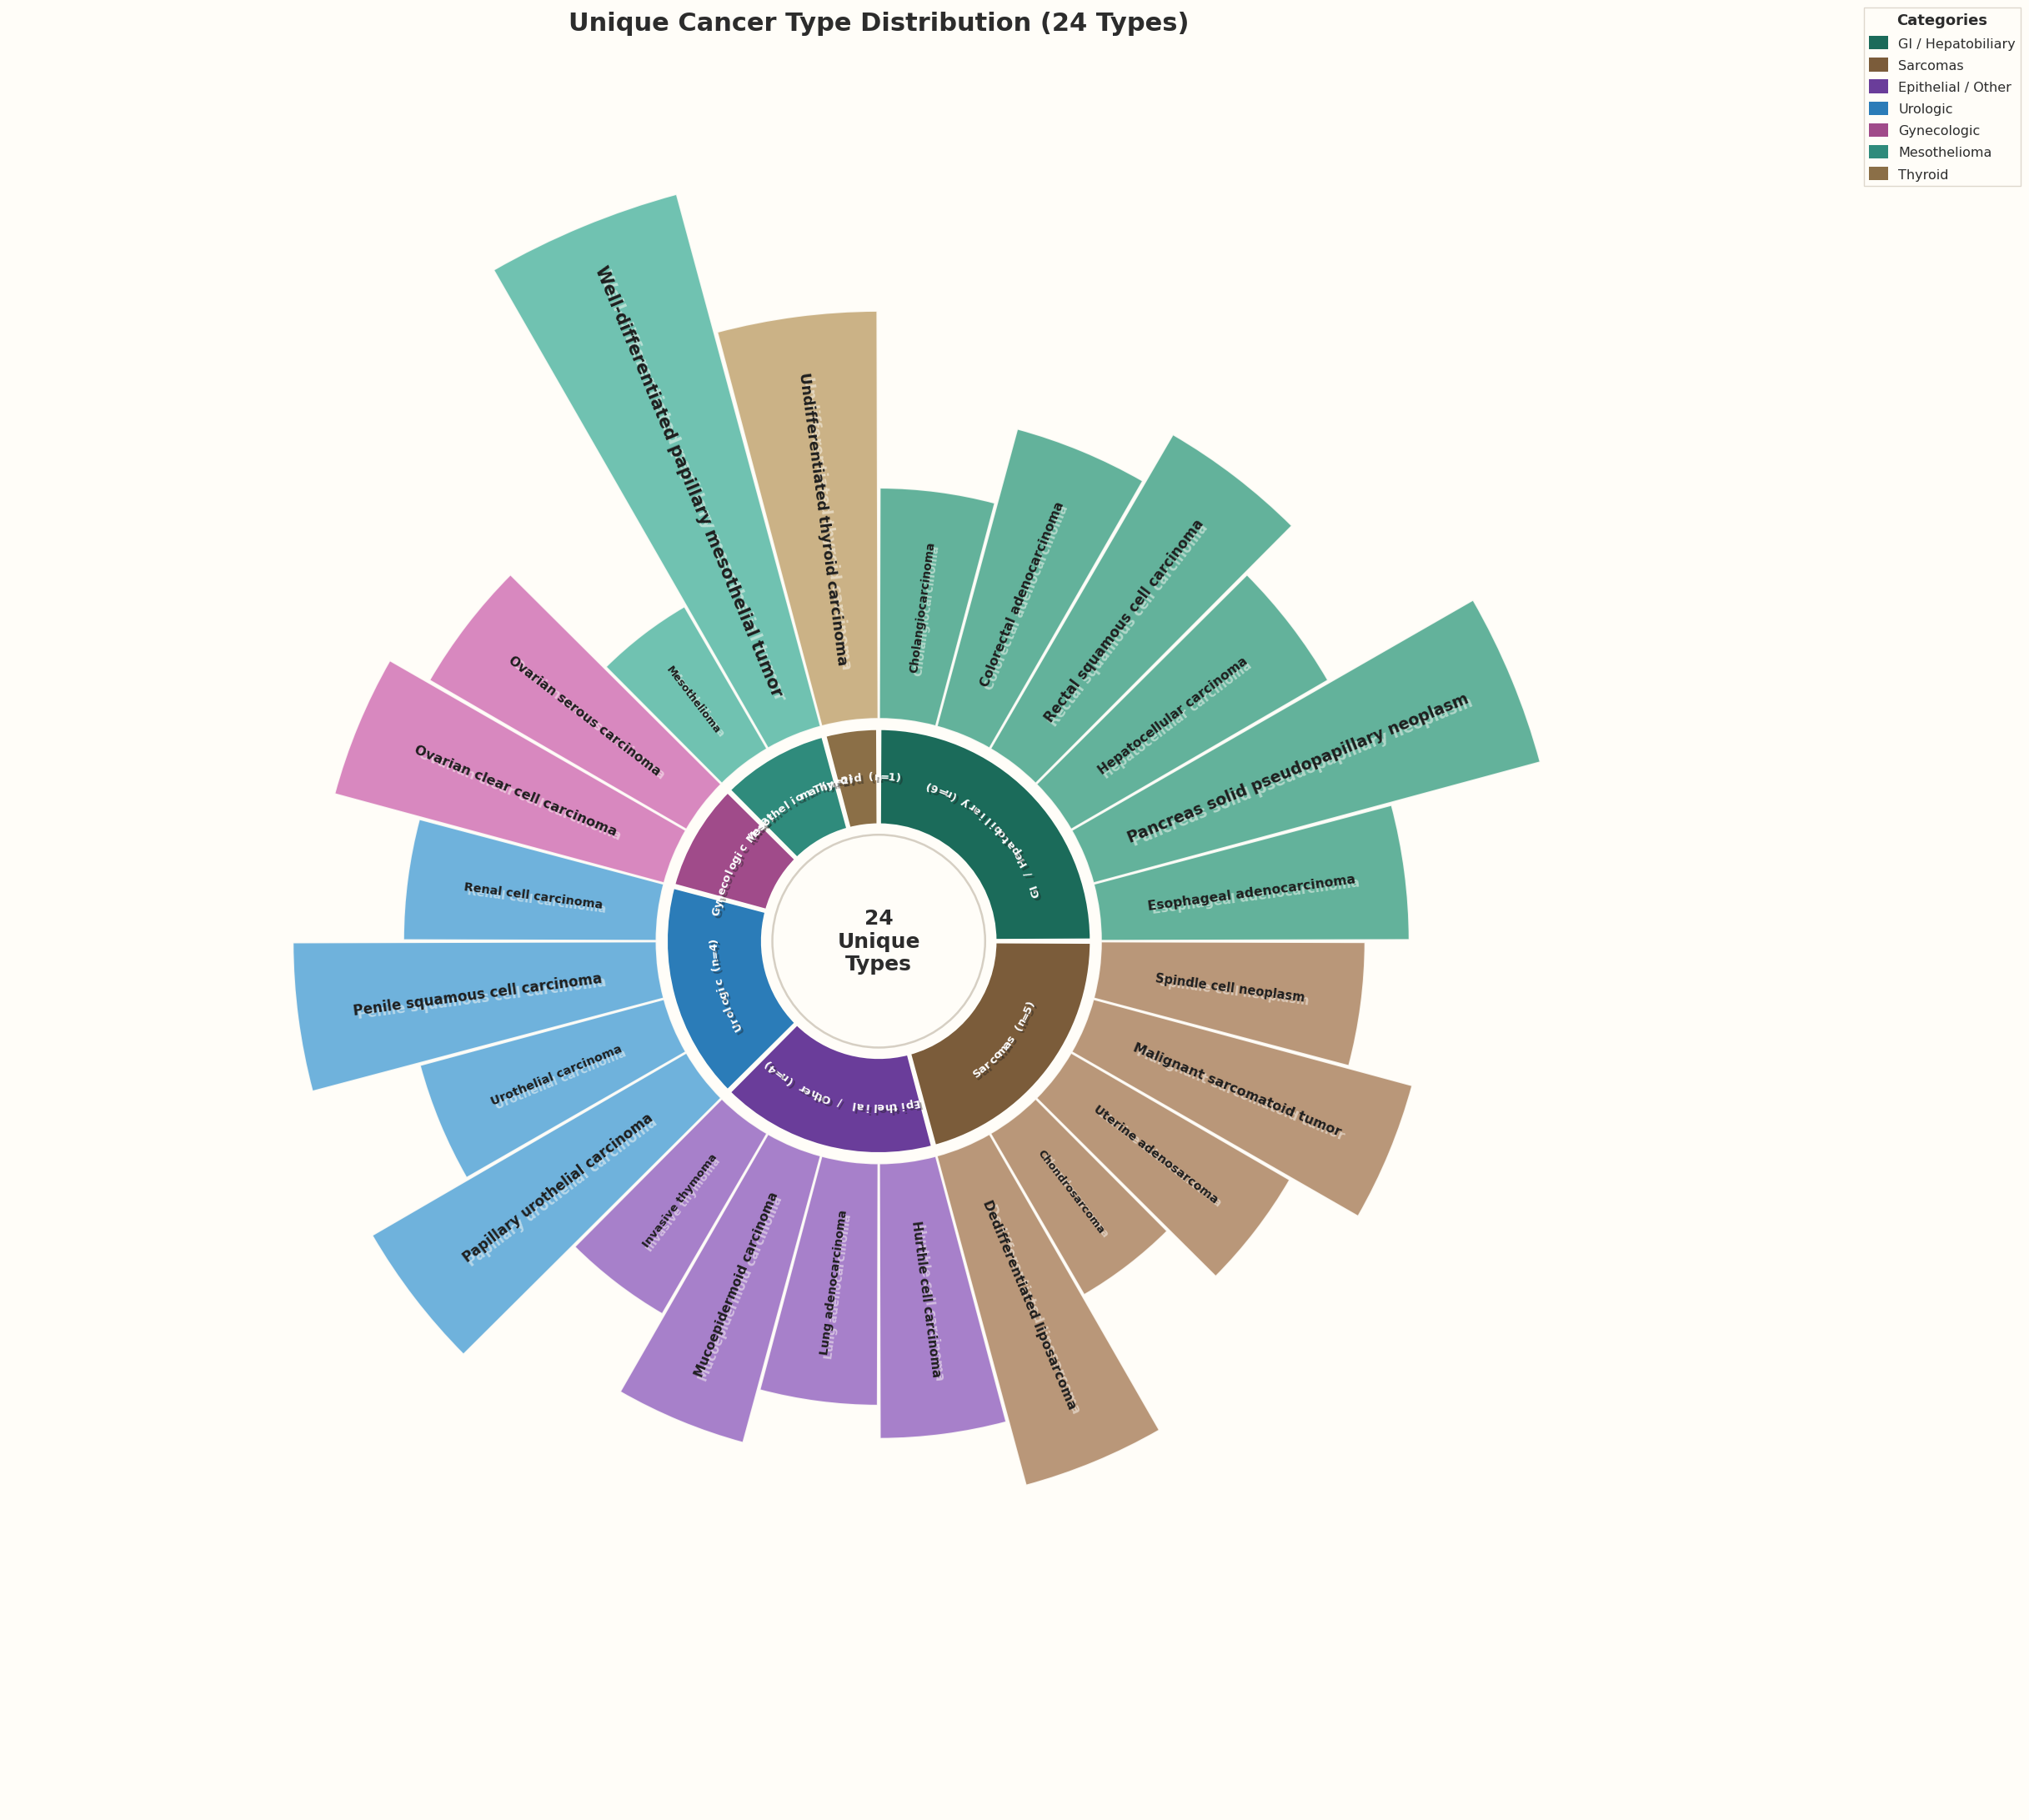

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.patches import Wedge, Patch
from collections import defaultdict, Counter

# ==========================================
# DATA - 24 UNIQUE CANCER TYPES (one per folder)
# ==========================================
all_data = {
    'MOS001S1': 'Ovarian clear cell carcinoma',
    'MOS002S1': 'Cholangiocarcinoma',
    'MOS003S1': 'Colorectal adenocarcinoma',
    'MOS004S1': 'Rectal squamous cell carcinoma',
    'MOS008S1': 'Hurthle cell carcinoma',
    'MOS010S1': 'Lung adenocarcinoma',
    'MOS014S1': 'Ovarian serous carcinoma',
    'MOS015S1': 'Papillary urothelial carcinoma',
    'MOS027S1': 'Urothelial carcinoma',
    'MOS033S1': 'Mucoepidermoid carcinoma',
    'MOS034S1': 'Penile squamous cell carcinoma',
    'MOS042S1': 'Renal cell carcinoma',
    'MOS055S1': 'Mesothelioma',
    'MOS058S1': 'Hepatocellular carcinoma',
    'MOS060S1': 'Well-differentiated papillary mesothelial tumor',
    'MOS061S1': 'Pancreas solid pseudopapillary neoplasm',
    'MOS064S1': 'Esophageal adenocarcinoma',
    'MOS067S1': 'Undifferentiated thyroid carcinoma',
    'MOS078S1': 'Invasive thymoma',
    'MOS082S1': 'Spindle cell neoplasm',
    'MOS083S1': 'Malignant sarcomatoid tumor',
    'MOS084S1': 'Uterine adenosarcoma',
    'MOS086S1': 'Chondrosarcoma',
    'MOS087S1': 'Dedifferentiated liposarcoma',
}

# ==========================================
# HELPERS
# ==========================================
def categorize(cancer):
    c = cancer.lower().strip()
    if 'melanoma' in c:
        return 'Melanomas'
    elif 'neuroendocrine' in c or 'merkel' in c:
        return 'Neuroendocrine'
    elif any(x in c for x in ['urothelial', 'renal', 'penile']):
        return 'Urologic'
    elif any(x in c for x in ['colorectal', 'rectal', 'cholangiocarcinoma',
                               'appendiceal', 'esophageal', 'hepatocellular', 'pancreas']):
        return 'GI / Hepatobiliary'
    elif any(x in c for x in ['sarcoma', 'spindle cell', 'sarcomatoid', 'chondrosarcoma', 'liposarcoma']):
        return 'Sarcomas'
    elif any(x in c for x in ['ovarian', 'uterine', 'cervical']):
        return 'Gynecologic'
    elif 'mesothelioma' in c or 'mesothelial' in c:
        return 'Mesothelioma'
    elif 'thyroid' in c:
        return 'Thyroid'
    else:
        return 'Epithelial / Other'

# ==========================================
# GROUP: category -> Counter of cancer_name -> count
# ==========================================
cat_types = defaultdict(Counter)
for cancer in all_data.values():
    cat_types[categorize(cancer)][cancer.strip()] += 1

# Sort categories by total count descending
sorted_cats = sorted(cat_types.items(), key=lambda x: -sum(x[1].values()))

total_cases = sum(sum(v.values()) for v in cat_types.values())

# ==========================================
# STYLE
# ==========================================
# Inner ring: deep saturated base colors
colors_inner = {
    'GI / Hepatobiliary': '#1B6B5A',   # deep teal
    'Epithelial / Other': '#6A3D9A',   # rich violet
    'Neuroendocrine':     '#D4711E',   # warm amber
    'Urologic':           '#2B7CB8',   # ocean blue
    'Melanomas':          '#B5343A',   # deep crimson
    'Sarcomas':           '#7B5C3A',   # warm brown
    'Gynecologic':        '#A04B8A',   # deep magenta
    'Mesothelioma':       '#2F8B7C',   # teal-green
    'Thyroid':            '#8B6F47',   # golden brown
}

# Outer ring: lighter, luminous tints of the same hues
colors_outer = {
    'GI / Hepatobiliary': '#4DA88E',   # fresh seafoam
    'Epithelial / Other': '#9B6FC4',   # soft lavender
    'Neuroendocrine':     '#F0A04B',   # golden peach
    'Urologic':           '#5BA8D9',   # sky blue
    'Melanomas':          '#E06068',   # coral rose
    'Sarcomas':           '#B08968',   # sandy beige
    'Gynecologic':        '#D378B8',   # soft pink
    'Mesothelioma':       '#5CBAA8',   # aqua
    'Thyroid':            '#C4A876',   # light gold
}

colors_map = colors_inner   # legacy alias for legend

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']

fig, ax = plt.subplots(figsize=(24, 24))
fig.patch.set_facecolor('#FFFDF8')
ax.set_facecolor('#FFFDF8')
ax.set_xlim(-4.5, 4.5)
ax.set_ylim(-4.5, 4.5)
ax.set_aspect('equal')
ax.axis('off')

inner_r1, inner_r2 = 0.6, 1.1
outer_r1 = 1.15

# ---- label scaling: build all display labels first ----
all_outer_labels = []
for cat, type_counter in sorted_cats:
    for name, count in type_counter.most_common():
        all_outer_labels.append(name)  # Just the cancer type name

min_len = min(len(l) for l in all_outer_labels)
max_len = max(len(l) for l in all_outer_labels)

def get_outer_radius(label):
    if max_len == min_len:
        norm = 0.5
    else:
        # Use just the name for length calculation
        label_name = label.replace(" (1)", "").strip()
        norm = (len(label_name) - min_len) / (max_len - min_len)
    return 2.0 + norm * 2.0          # 2.0 … 4.0

def get_font_size(label):
    norm = (get_outer_radius(label) - 2.0) / 2.0
    return 9 + norm * 6              # 9 … 15

# ==========================================
# DRAWING
# ==========================================
cat_gap  = 0.5
type_gap = 0.3
current_angle = 90

for cat, type_counter in sorted_cats:
    cat_total      = sum(type_counter.values())
    color_in  = colors_inner.get(cat, '#888888')
    color_out = colors_outer.get(cat, '#AAAAAA')
    cat_angle_span = (cat_total / total_cases) * 360

    cat_start = current_angle
    cat_end   = current_angle - cat_angle_span

    # ---- inner wedge (category) ----
    wi_start = cat_start - cat_gap / 2
    wi_end   = cat_end   + cat_gap / 2

    if wi_start > wi_end:
        ax.add_patch(Wedge((0, 0), inner_r2, wi_end, wi_start,
                           width=(inner_r2 - inner_r1),
                           facecolor=color_in, edgecolor='#FFFDF8', linewidth=3.0))

        if (wi_start - wi_end) > 5:
            label_r = (inner_r1 + inner_r2) / 2  
            mid_ang_deg = (wi_start + wi_end) / 2

            # bottom half → flip so text reads left-to-right
            flip = (90 < mid_ang_deg % 360 < 270)

            txt = f"{cat} (n={cat_total})"

            # Each char ~0.042 rad at this radius for fontsize 9.5
            char_width_rad = 0.042
            total_width_rad = len(txt) * char_width_rad
            start_offset = total_width_rad / 2

            mid_ang_rad = np.deg2rad(mid_ang_deg)

            for i, ch in enumerate(txt):
                if flip:
                    char_ang_rad = mid_ang_rad + (start_offset - (i + 0.5) * char_width_rad)
                    rotation = np.rad2deg(char_ang_rad) - 90
                else:
                    char_ang_rad = mid_ang_rad - (start_offset - (i + 0.5) * char_width_rad)
                    rotation = np.rad2deg(char_ang_rad) + 90

                x = label_r * np.cos(char_ang_rad)
                y = label_r * np.sin(char_ang_rad)

                # shadow
                ax.text(x + 0.012, y - 0.012, ch,
                        ha='center', va='center', fontsize=9.5, fontweight='bold',
                        color='#1A1A1A', alpha=0.4, rotation=rotation)
                # main
                ax.text(x, y, ch,
                        ha='center', va='center', fontsize=9.5, fontweight='bold',
                        color='white', rotation=rotation)

    # ---- outer wedges (one per DISTINCT type, all equal size) ----
    cur = cat_start
    for type_name, type_count in type_counter.most_common():
        # wedge angle proportional to this type's count (all are 1)
        span = (type_count / total_cases) * 360

        wo_start = cur          - type_gap / 2
        wo_end   = (cur - span) + type_gap / 2

        label = type_name  # No count needed since all are unique
        r2    = get_outer_radius(f"{label} (1)")  # Still use for radius calculation
        fs    = get_font_size(f"{label} (1)")     # Still use for font size calculation

        if wo_start > wo_end:
            ax.add_patch(Wedge((0, 0), r2, wo_end, wo_start,
                               width=(r2 - outer_r1),
                               facecolor=color_out, edgecolor='#FFFDF8',
                               linewidth=1.2, alpha=0.88))

            mid_ang     = (wo_start + wo_end) / 2
            mid_ang_rad = np.deg2rad(mid_ang)
            label_r     = (outer_r1 + r2) / 2
            x = label_r * np.cos(mid_ang_rad)
            y = label_r * np.sin(mid_ang_rad)

            rotation = mid_ang
            if 90 < mid_ang % 360 < 270:
                rotation += 180

            # shadow
            ax.text(x + 0.02, y - 0.02, label,
                    ha='center', va='center', fontsize=fs, fontweight='bold',
                    color='#FFFDF8', alpha=0.5,
                    rotation=rotation, rotation_mode='anchor')
            # main
            ax.text(x, y, label,
                    ha='center', va='center', fontsize=fs, fontweight='bold',
                    color='#1E1E1E',
                    rotation=rotation, rotation_mode='anchor')

        cur -= span

    current_angle -= cat_angle_span

# ==========================================
# CENTER CIRCLE & LEGEND
# ==========================================
ax.add_patch(plt.Circle((0, 0), 0.55, facecolor='#FFFDF8',
                         edgecolor='#D6CFC3', linewidth=1.8, zorder=5))
ax.text(0, 0, f"24\nUnique\nTypes", ha='center', va='center',
        fontsize=18, fontweight='bold', color='#2C2C2C', zorder=6)

legend_elements = [Patch(facecolor=colors_inner.get(cat, '#888888'),
                         edgecolor='none', label=cat)
                   for cat, _ in sorted_cats]
leg = ax.legend(handles=legend_elements, loc='upper right',
                bbox_to_anchor=(1.16, 1.04),
                frameon=True, fancybox=False, edgecolor='#D6CFC3',
                facecolor='#FFFDF8', fontsize=11.5,
                title='Categories', title_fontsize=13,
                labelspacing=0.6, handlelength=1.4, handleheight=1.2)
leg.get_title().set_fontweight('bold')
leg.get_title().set_color('#2C2C2C')
for t in leg.get_texts():
    t.set_color('#2C2C2C')

plt.title("Unique Cancer Type Distribution (24 Types)", fontsize=22,
          fontweight='bold', pad=35, color='#2C2C2C')
plt.tight_layout()

# ==========================================
# SAVE
# ==========================================
plt.savefig('cancer_type_hierarchy_24.pdf', format='pdf', bbox_inches='tight')
print("Saved: cancer_type_hierarchy_24.pdf")
plt.show()

In [12]:
import os
from collections import Counter

# ==========================================
# CONFIGURATION
# ==========================================
BASE_DIR = "/rsrch9/home/plm/idso_fa1_pathology/TIER2/yasin-vitaminp/Pathology_val_dsp"

# ==========================================
# COMPLETE DATA MAPPING
# ==========================================
all_data = {
    'MOS001S1': 'Ovarian clear cell carcinoma',
    'MOS002S1': 'Cholangiocarcinoma',
    'MOS003S1': 'Colorectal adenocarcinoma',
    'MOS004S1': 'Rectal squamous cell carcinoma',
    'MOS005S1': 'Cholangiocarcinoma',
    'MOS006S1': 'Cholangiocarcinoma',
    'MOS007S1': 'Cholangiocarcinoma',
    'MOS008S1': 'Hurthle cell carcinoma',
    'MOS009S1': 'Cholangiocarcinoma',
    'MOS010S1': 'Lung adenocarcinoma',
    'MOS011S1': 'Papillary thyroid carcinoma',
    'MOS012S1': 'Colorectal adenocarcinoma',
    'MOS014S1': 'Ovarian serous carcinoma',
    'MOS015S1': 'Papillary urothelial carcinoma',
    'MOS016S1': 'Papillary urothelial carcinoma',
    'MOS017S1': 'Papillary urothelial carcinoma',
    'MOS018S1': 'Papillary urothelial carcinoma',
    'MOS019S1': 'Papillary urothelial carcinoma',
    'MOS020S1': 'Papillary urothelial carcinoma',
    'MOS021S1': 'Papillary urothelial carcinoma',
    'MOS022S1': 'Papillary urothelial carcinoma',
    'MOS023S1': 'Papillary urothelial carcinoma',
    'MOS024S1': 'Papillary urothelial carcinoma',
    'MOS025S1': 'Papillary urothelial carcinoma',
    'MOS026S1': 'Papillary urothelial carcinoma',
    'MOS027S1': 'Urothelial carcinoma',
    'MOS028S1': 'Papillary urothelial carcinoma',
    'MOS029S1': 'Papillary urothelial carcinoma',
    'MOS030S1': 'Appendiceal adenocarcinoma',
    'MOS031S1': 'Rectal squamous cell carcinoma',
    'MOS032S1': 'Cholangiocarcinoma',
    'MOS033S1': 'Mucoepidermoid carcinoma',
    'MOS034S1': 'Penile squamous cell carcinoma',
    'MOS035S1': 'Papillary urothelial carcinoma',
    'MOS036S1': 'Penile squamous cell carcinoma',
    'MOS037S1': 'Papillary urothelial carcinoma',
    'MOS038S1': 'Papillary urothelial carcinoma',
    'MOS039S1': 'Papillary urothelial carcinoma',
    'MOS040S1': 'Papillary urothelial carcinoma',
    'MOS041S1': 'Urothelial carcinoma',
    'MOS042S1': 'Renal cell carcinoma',
    'MOS043S1': 'Papillary urothelial carcinoma',
    'MOS044S1': 'Papillary urothelial carcinoma',
    'MOS045S1': 'Medullary thyroid carcinoma',
    'MOS046S1': 'Pancreatic neuroendocrine tumor',
    'MOS047S1': 'Lung neuroendocrine carcinoma',
    'MOS048T2S1': 'Cervical neuroendocrine carcinoma',
    'MOS049T2S1': 'Neuroendocrine carcinoma',
    'MOS050T2S1': 'Pancreatic neuroendocrine tumor',
    'MOS051T2S1': 'Pancreatic neuroendocrine tumor',
    'MOS052T2S1': 'Merkel cell carcinoma',
    'MOS053T2S1': 'Neuroendocrine tumor',
    'MOS054T2S1': 'Neuroendocrine tumor',
    'MOS055S1': 'Mesothelioma',
    'MOS056S1': 'Mesothelioma',
    'MOS057S1': 'Mesothelioma',
    'MOS058S1': 'Hepatocellular carcinoma',
    'MOS059S1': 'Ovarian clear cell carcinoma',
    'MOS060S1': 'Well-differentiated papillary mesothelial tumor',
    'MOS061S1': 'Pancreas solid pseudopapillary neoplasm',
    'MOS062S1': 'Colorectal adenocarcinoma',
    'MOS063S1': 'Mucoepidermoid carcinoma',
    'MOS064S1': 'Esophageal adenocarcinoma',
    'MOS065S1': 'Esophageal adenocarcinoma',
    'MOS066S1': 'Papillary urothelial carcinoma',
    'MOS067S1': 'Undifferentiated thyroid carcinoma',
    'MOS068S1': 'Papillary urothelial carcinoma',
    'MOS069S1': 'Papillary urothelial carcinoma',
    'MOS070S1': 'Anorectal melanoma',
    'MOS071S1': 'Anorectal melanoma',
    'MOS072S1': 'Anorectal melanoma',
    'MOS073S1': 'Uveal melanoma',
    'MOS074S1': 'Uveal melanoma',
    'MOS075S1': 'Uveal melanoma',
    'MOS076S1': 'Cutaneous melanoma',
    'MOS077S1': 'Colorectal adenocarcinoma',
    'MOS078S1': 'Invasive thymoma',
    'MOS079S1': 'Papillary urothelial carcinoma',
    'MOS080S1': 'Colorectal adenocarcinoma',
    'MOS081S1': 'Neuroendocrine tumor',
    'MOS082S1': 'Spindle cell neoplasm',
    'MOS083S1': 'Malignant sarcomatoid tumor',
    'MOS084S1': 'Uterine adenosarcoma',
    'MOS085S1': 'Spindle cell malignant neoplasm',
    'MOS086S1': 'Chondrosarcoma',
    'MOS087S1': 'Dedifferentiated liposarcoma',
}

def read_current_directory():
    """Read the actual directory and show what's currently there"""
    
    print("="*80)
    print("CURRENT DIRECTORY STATE")
    print("="*80)
    
    if not os.path.exists(BASE_DIR):
        print(f"ERROR: Directory does not exist: {BASE_DIR}")
        print(f"Please update BASE_DIR in the script to your actual path")
        return
    
    # Get all folders
    folders = sorted([f for f in os.listdir(BASE_DIR) 
                     if os.path.isdir(os.path.join(BASE_DIR, f)) and f.startswith('MOS')])
    
    print(f"\nTotal folders found: {len(folders)}")
    print(f"\nFolders:\n{', '.join(folders)}")
    
    # Map each folder to its cancer type
    print("\n" + "="*80)
    print("FOLDER -> CANCER TYPE MAPPING")
    print("="*80)
    
    folder_to_cancer = {}
    for folder in folders:
        # Find matching slide ID
        matching_slides = [sid for sid in all_data.keys() if sid.startswith(folder)]
        if matching_slides:
            cancer_type = all_data[matching_slides[0]]
            folder_to_cancer[folder] = cancer_type
            print(f"{folder} -> {cancer_type}")
        else:
            folder_to_cancer[folder] = "UNKNOWN"
            print(f"{folder} -> UNKNOWN (no mapping found)")
    
    # Count unique cancer types
    cancer_counts = Counter(folder_to_cancer.values())
    unique_types = len([c for c in cancer_counts.keys() if c != "UNKNOWN"])
    
    print("\n" + "="*80)
    print("CANCER TYPE FREQUENCY")
    print("="*80)
    
    for cancer_type, count in sorted(cancer_counts.items(), key=lambda x: (-x[1], x[0])):
        if cancer_type != "UNKNOWN":
            # Show which folders have this cancer type
            folders_with_type = [f for f, c in folder_to_cancer.items() if c == cancer_type]
            if count > 1:
                print(f"\n{cancer_type}: {count} folders")
                print(f"  Folders: {', '.join(folders_with_type)}")
            else:
                print(f"\n{cancer_type}: 1 folder ({folders_with_type[0]})")
    
    print("\n" + "="*80)
    print("SUMMARY")
    print("="*80)
    print(f"Total folders: {len(folders)}")
    print(f"Unique cancer types: {unique_types}")
    print(f"Duplicate cancer types: {len(folders) - unique_types}")
    
    return folders, folder_to_cancer

if __name__ == "__main__":
    folders, mapping = read_current_directory()

CURRENT DIRECTORY STATE

Total folders found: 24

Folders:
MOS001, MOS002, MOS003, MOS004, MOS008, MOS010, MOS014, MOS015, MOS027, MOS033, MOS034, MOS042, MOS055, MOS058, MOS060, MOS061, MOS064, MOS067, MOS078, MOS082, MOS083, MOS084, MOS086, MOS087

FOLDER -> CANCER TYPE MAPPING
MOS001 -> Ovarian clear cell carcinoma
MOS002 -> Cholangiocarcinoma
MOS003 -> Colorectal adenocarcinoma
MOS004 -> Rectal squamous cell carcinoma
MOS008 -> Hurthle cell carcinoma
MOS010 -> Lung adenocarcinoma
MOS014 -> Ovarian serous carcinoma
MOS015 -> Papillary urothelial carcinoma
MOS027 -> Urothelial carcinoma
MOS033 -> Mucoepidermoid carcinoma
MOS034 -> Penile squamous cell carcinoma
MOS042 -> Renal cell carcinoma
MOS055 -> Mesothelioma
MOS058 -> Hepatocellular carcinoma
MOS060 -> Well-differentiated papillary mesothelial tumor
MOS061 -> Pancreas solid pseudopapillary neoplasm
MOS064 -> Esophageal adenocarcinoma
MOS067 -> Undifferentiated thyroid carcinoma
MOS078 -> Invasive thymoma
MOS082 -> Spindle cell 